In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [10]:
def softmax(z):
    ez=np.exp(z)
    sm=ez/np.sum(ez)
    return sm

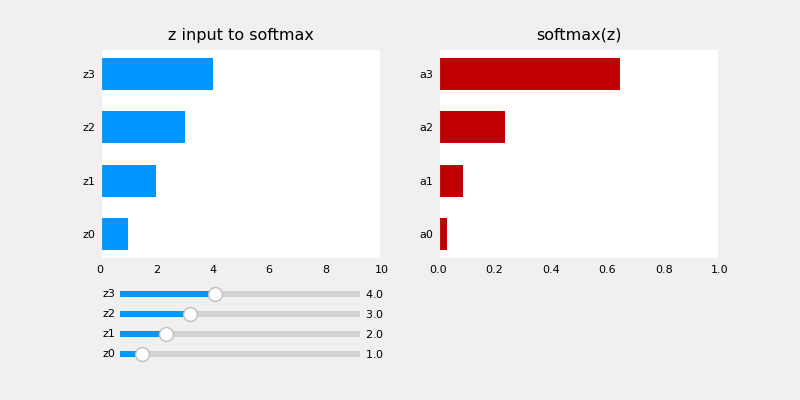

In [11]:
plt.close("all")
plt_softmax(softmax)

### cost

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


In [12]:
# make  dataset 
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

The model below is implemented with the softmax as an activation in the final Dense layer.
The loss function is separately specified in the `compile` directive. 

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities. 

In [31]:
obvious_model= Sequential(
    [
        Dense(25,activation="relu"),
        Dense(15,activation="relu"),
        Dense(4,activation="softmax")
    ]
)
obvious_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01)
)
obvious_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 0.5188 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.0422
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.0282
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.0184
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.0218
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 0.0171
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0354
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0122
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.0144
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.0275   


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [34]:
# non prefered 
p_nonpreferred = obvious_model.predict(X_train)
print(p_nonpreferred)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
[[1.9026689e-06 6.2898151e-04 9.9882168e-01 5.4749183e-04]
 [9.9999982e-01 1.0241752e-07 3.4008332e-10 1.4021095e-08]
 [9.9992472e-01 7.3514406e-05 3.1773914e-07 1.2949454e-06]
 ...
 [3.1555406e-05 9.9828291e-01 1.6383700e-03 4.7259313e-05]
 [2.3646000e-19 2.9061517e-11 7.9553146e-09 9.9999994e-01]
 [1.0931480e-05 1.3392750e-03 9.9858618e-01 6.3611980e-05]]
[[1.9026689e-06 6.2898151e-04 9.9882168e-01 5.4749183e-04]
 [9.9999982e-01 1.0241752e-07 3.4008332e-10 1.4021095e-08]]
largest value 0.99999994 smallest value 9.571929e-30


In [25]:
prefered_model= Sequential(
    [
        Dense(25,activation='relu'),
        Dense(15,activation='relu'),
        Dense(4,activation='linear')
    ]
)
prefered_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)
prefered_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - loss: 1.1890 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.6885
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.4257
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.2785
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.1530
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.0949
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 0.0737
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0593
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0477
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.0492


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

In [27]:
p_preferred = prefered_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
two example output vectors:
 [[-1.8465077 -1.3738253  4.7026396  1.1767063]
 [ 3.4684873 -1.6451207 -6.044919  -3.7369814]]
largest value 12.886708 smallest value -10.684417


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).

In [36]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.3854067e-03 2.2225969e-03 9.6791172e-01 2.8480157e-02]
 [9.9321550e-01 5.9735402e-03 7.3353942e-05 7.3747657e-04]]
largest value 0.99999994 smallest value 4.0779287e-09


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [37]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-1.8465077 -1.3738253  4.7026396  1.1767063], category: 2
[ 3.4684873 -1.6451207 -6.044919  -3.7369814], category: 0
[ 2.1482294  -0.99407053 -4.8577347  -3.039969  ], category: 0
[-3.4830785  1.601549  -3.5969963 -1.9976896], category: 1
[ 0.62160003 -2.6321301   5.8919683  -0.2846209 ], category: 2
